### Airline Customer Satifaction

Task: To get the best predictive model using ANN 

In [1]:
# Importing the required dependencies
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Importing the required libraries for the 3rd problem 
from sklearn import datasets
import tensorflow as tf 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout 
from keras.layers import BatchNormalization 
from keras.utils import plot_model
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold

### Loading the dataset and basic EDA and preprocessing

In [2]:
dataset = pd.read_csv('train.csv')


In [3]:
dataset.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


we drop some redundent columns like unnamed and id

In [4]:
dataset.drop(columns=['Unnamed: 0', 'id'],inplace=True)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [6]:
dataset.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


checking for null entries 

In [7]:
dataset.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

we remove the rows will missing values 

In [8]:
dataset.dropna(inplace=True)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    103594 no

In [10]:
# for i in dataset.columns:
#     print(dataset.groupby('satisfaction')[i].value_counts()/len(dataset))

In [11]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [12]:
for i in dataset.select_dtypes(include=object):
    encoder = LabelEncoder()
    dataset[i] = encoder.fit_transform(dataset[i])

In [13]:
dataset

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,1,0,49,0,0,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,1,1,30,0,0,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,0,1,22,0,1,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


Getting the features and target varibale

In [14]:
X = dataset.drop(columns=['satisfaction'])

y = dataset['satisfaction']

Splitting the data into testing and training data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [16]:
# function to scale the tranning and testing features 

def standardize(X_train,X_test):

    scalar = StandardScaler()

    X_train_scaled = scalar.fit_transform(X_train)
    X_test_scaled = scalar.fit_transform(X_test)

    return X_train_scaled,X_test_scaled

In [17]:
X_train_scaled,X_test_scaled = standardize(X_train,X_test)

In [18]:
X_train.shape

(72515, 22)

In [19]:

model = Sequential()


model.add(Dense(128, name= 'First_Hidden_layer', input_dim=22, activation="mish"))
model.add(BatchNormalization())

model.add(Dense(64, name= '1Second_Hidden_layer', activation="mish"))
model.add(BatchNormalization())

model.add(Dense(64, name= 'Second_Hidden_layer', activation="mish"))
model.add(BatchNormalization())

model.add(Dense(32, name= '3Third_Hidden_layer', activation="mish") )
model.add(BatchNormalization())

model.add(Dense(1,name = 'Output_Layer',activation = 'sigmoid'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_Hidden_layer (Dense)  (None, 128)               2944      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 1Second_Hidden_layer (Dens  (None, 64)                8256      
 e)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 Second_Hidden_layer (Dense  (None, 64)                4160      
 )                                                      

In [20]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=20,batch_size=32,shuffle=True)

Epoch 1/20


2267/2267 [==============================] - 11s 4ms/step - loss: 0.1900 - accuracy: 0.9231 - val_loss: 0.1212 - val_accuracy: 0.9487
Epoch 2/20
2267/2267 [==============================] - 9s 4ms/step - loss: 0.1464 - accuracy: 0.9405 - val_loss: 0.1110 - val_accuracy: 0.9545
Epoch 3/20
2267/2267 [==============================] - 9s 4ms/step - loss: 0.1273 - accuracy: 0.9486 - val_loss: 0.1035 - val_accuracy: 0.9567
Epoch 4/20
2267/2267 [==============================] - 9s 4ms/step - loss: 0.1193 - accuracy: 0.9514 - val_loss: 0.0995 - val_accuracy: 0.9589
Epoch 5/20
2267/2267 [==============================] - 8s 4ms/step - loss: 0.1135 - accuracy: 0.9536 - val_loss: 0.0996 - val_accuracy: 0.9585
Epoch 6/20
2267/2267 [==============================] - 9s 4ms/step - loss: 0.1087 - accuracy: 0.9544 - val_loss: 0.0995 - val_accuracy: 0.9588
Epoch 7/20
2267/2267 [==============================] - 9s 4ms/step - loss: 0.1033 - accuracy: 0.9574 - val_loss: 0.0934 - val_accuracy: 0.9613
Ep

In [21]:
y_pred = model.predict(X_test_scaled)

972/972 [==============================] - 2s 2ms/step


In [22]:
y_pred = np.array(y_pred > 0.5).astype(np.int64)

In [23]:
print('Accuracy Score',accuracy_score(y_test,y_pred),'\n')
print('Classification Report',classification_report(y_test,y_pred),'\n')
print('Confusion Matrix',confusion_matrix(y_test,y_pred),'\n')

Accuracy Score 0.962997522442807 

Classification Report               precision    recall  f1-score   support

           0       0.95      0.98      0.97     17643
           1       0.97      0.94      0.96     13436

    accuracy                           0.96     31079
   macro avg       0.96      0.96      0.96     31079
weighted avg       0.96      0.96      0.96     31079
 

Confusion Matrix [[17312   331]
 [  819 12617]] 



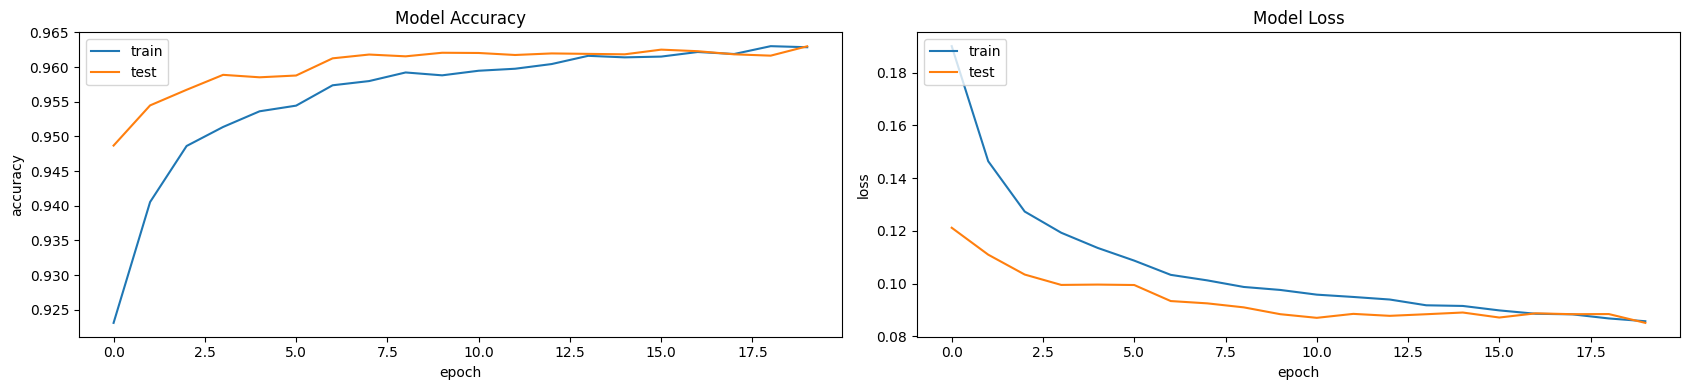

In [24]:
plt.figure(figsize=(17,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()